Table of contents:

[Data preparation](#data-preparation)

[Checking the standard deviation boundary](#checking-the-standard-deviation-boundary)

[Checking the mean value](#checking-the-mean-value)

[Checking the individual simulations](#checking-the-individual-simulations)

[Checking the standard deviation](#checking-the-standard-deviation)

[Norm limit test](#norm-limit-test)
  - [Norm Linf](#norm-linf)
  - [Norm L2](#norm-l2)

[Set multiple tests](#set-multiple-tests)

In [26]:
from citros_data_analysis import data_access as da
from citros_data_analysis import validation as va

## Data preparation

Globular clusters belongs to the halo part of the Galaxy. We can check if the 'z' coordinate, that is the vertical coordinate of the cluster from the galactic plane
, exceed the thickness of the Galaxy thick disc D = 1.2 kpc in all simulations.

Let's download data, columns 'data.data[0]' and 'data.data[5]', that are time and vertical coordinate correspondingly:

In [27]:
#create `CitrosDB` object to download data:
citros = da.CitrosDB()

#download data
df = citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[5]'])
df.rename({'data.data[0]': 't', 'data.data[5]': 'z'}, axis = 1, inplace = True)
df.head(5)

,sid,rid,time,topic,type,t,z
0,0,0,1696148856301534862,/gal_orbits,std_msgs/msg/Float64MultiArray,0.000000,1.174160
1,0,1,1696148856401467749,/gal_orbits,std_msgs/msg/Float64MultiArray,0.009685,1.183775
2,0,2,1696148856501479403,/gal_orbits,std_msgs/msg/Float64MultiArray,0.073601,1.244424
3,0,3,1696148856601395552,/gal_orbits,std_msgs/msg/Float64MultiArray,0.159232,1.318104
4,0,4,1696148856701462832,/gal_orbits,std_msgs/msg/Float64MultiArray,0.269208,1.400189


Construct Validation object. It determines how the data will be preprocessed:

- `data_label` determine data columns, 
- `param_label` is for independent variable that will be used for setting correspondence between different sids and 
- `method` determines the method of index assignment:
  - 'scale': by scaling 'param_label' to unit interval and interpolating data on this interval,
  - 'bin': by deviding 'param_label' on bins and calculating mean data values among points falled in each bin, 
- `num` determines number of points if method set as 'scale' or bins if 'method' set as 'bin':

In [28]:
V = va.Validation(df, data_label = 'z', param_label = 't', method = 'scale', num = 50, units = 'kpc')

## Checking the standard deviation boundary

Test whether the standard deviation boundary is within the limits

- `limits`: 
  - a one value to set the same +-limits to elements of the vector, for examples limits = 0.25
  - list of values to set +-limits for each vector element, for examples limits = [0.25, 0.5, 100]
  - list of lists to set lower and upper intervals separately, for examples limits = [0.25, [-0.3, 0.8], [-150, 100]]
- `n_std`: number of standard deviations in standard deviation boundary
- `nan_passed`: whether nan values are treated as passed test or not
- to style the plot:
  - `std_area` - set True to fill with color standard deviation boundary
  - `std_lines` - set False to remove standard deviation boundary lines
  - `std_color` - set standard deviation boundary color, default 'b'

 Let's test if the 3 standard deviation boundary exceeds the thickness of the disc D = 1.2 kpc:

std_bound_test: failed


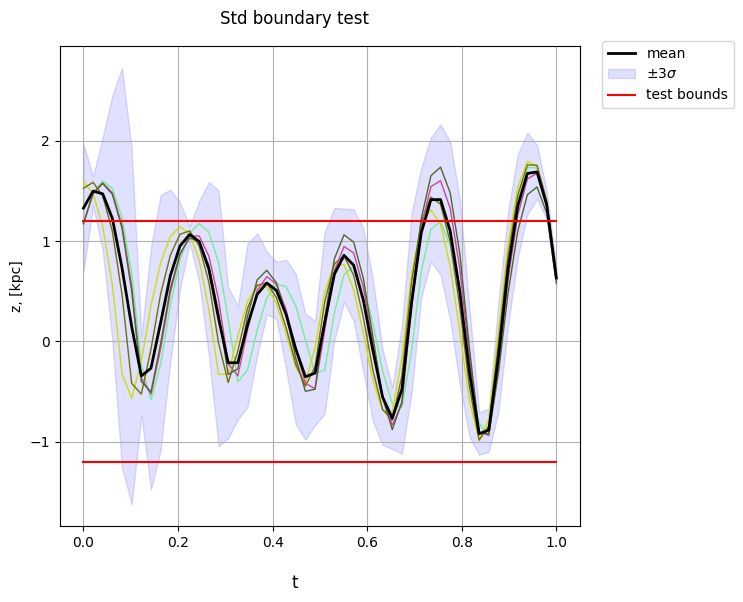

In [29]:
log, table, fig = V.std_bound_test(limits = 1.2, n_std = 3, nan_passed = True, std_area = True, std_lines = False, std_color = 'b')

Print the report of the test:

In [30]:
log.print()

{
 'test_param': {
   'limits': 1.2,
   'n_std': 3,
   'nan_passed': True
 },
 'z': {
   'passed': False,
   'pass_rate': 0.46,
   'failed': {
     0: 0.0,
     1: 0.02040816326530612,
     2: 0.04081632653061224,
     3: 0.061224489795918366,
     4: 0.08163265306122448,
     5: 0.1020408163265306,
     7: 0.14285714285714285,
     8: 0.16326530612244897,
     9: 0.18367346938775508,
     10: 0.2040816326530612,
     12: 0.24489795918367346,
     13: 0.26530612244897955,
     14: 0.2857142857142857,
     26: 0.5306122448979591,
     27: 0.5510204081632653,
     28: 0.5714285714285714,
     34: 0.6938775510204082,
     35: 0.7142857142857142,
     36: 0.7346938775510203,
     37: 0.7551020408163265,
     38: 0.7755102040816326,
     39: 0.7959183673469387,
     44: 0.8979591836734693,
     45: 0.9183673469387754,
     46: 0.9387755102040816,
     47: 0.9591836734693877,
     48: 0.9795918367346939
   },
   'nan_std': {
   }
 }
}


As predicted, test is not passed because z coordinate exceed the limits. Let's printindex and corresponding to this index t value by:

In [31]:
print('\nvalue of the z that does not passed the test:')

log['z']['failed'].print()


value of the z that does not passed the test:
{
 0: 0.0,
 1: 0.02040816326530612,
 2: 0.04081632653061224,
 3: 0.061224489795918366,
 4: 0.08163265306122448,
 5: 0.1020408163265306,
 7: 0.14285714285714285,
 8: 0.16326530612244897,
 9: 0.18367346938775508,
 10: 0.2040816326530612,
 12: 0.24489795918367346,
 13: 0.26530612244897955,
 14: 0.2857142857142857,
 26: 0.5306122448979591,
 27: 0.5510204081632653,
 28: 0.5714285714285714,
 34: 0.6938775510204082,
 35: 0.7142857142857142,
 36: 0.7346938775510203,
 37: 0.7551020408163265,
 38: 0.7755102040816326,
 39: 0.7959183673469387,
 44: 0.8979591836734693,
 45: 0.9183673469387754,
 46: 0.9387755102040816,
 47: 0.9591836734693877,
 48: 0.9795918367346939
}


The DataFrame table indicates whether each point passes the test or not:

In [32]:
print(table.head(5)) #method head(n) shows first n rows of the DataFrame table

             t      z
t_id                 
0     0.000000  False
1     0.020408  False
2     0.040816  False
3     0.061224  False
4     0.081633  False


## Checking the mean value

Define limits within which the mean value should be, for example |z| < 1.2

mean_test: failed


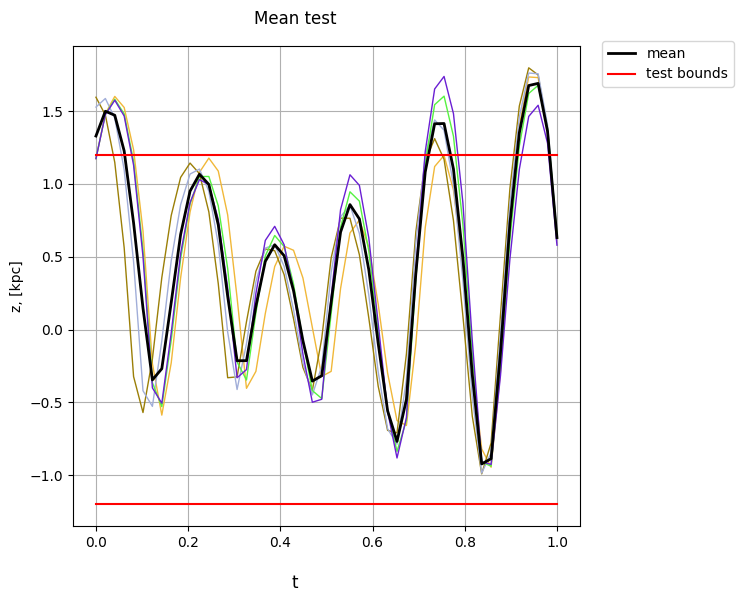

In [33]:
log, table, fig = V.mean_test(limits = 1.2)

Print the report of the test:

In [34]:
log.print()

{
 'test_param': {
   'limits': 1.2
 },
 'z': {
   'passed': False,
   'pass_rate': 0.8,
   'failed': {
     0: 0.0,
     1: 0.02040816326530612,
     2: 0.04081632653061224,
     3: 0.061224489795918366,
     36: 0.7346938775510203,
     37: 0.7551020408163265,
     45: 0.9183673469387754,
     46: 0.9387755102040816,
     47: 0.9591836734693877,
     48: 0.9795918367346939
   }
 }
}


DataFrame table that for each point indicates whether it passes the test or not:

In [35]:
print(table.head(5)) #method head(n) shows first n rows of the DataFrame table

             t      z
t_id                 
0     0.000000  False
1     0.020408  False
2     0.040816  False
3     0.061224  False
4     0.081633   True


## Checking the individual simulations

sid_test: failed


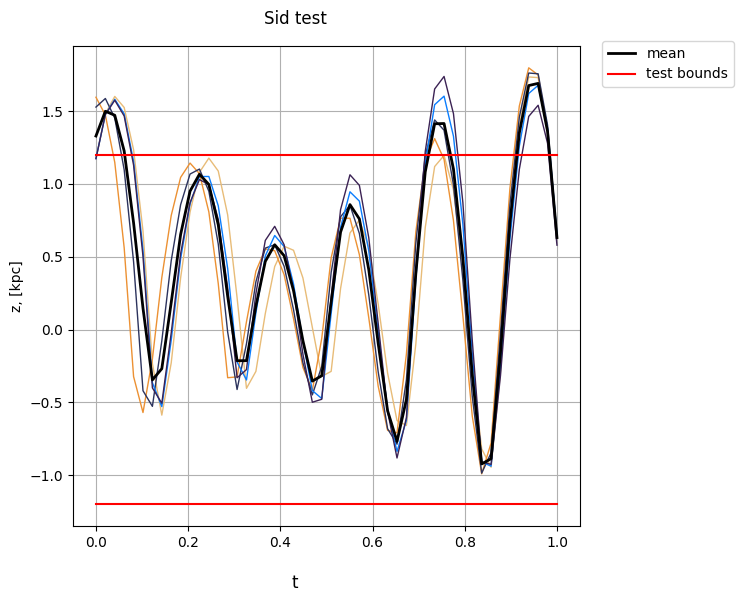

In [36]:
log, table, fig = V.sid_test(limits = 1.2)

Print the report of the test:

In [37]:
log.print()

{
 'test_param': {
   'limits': 1.2
 },
 'z': {
   'passed': False,
   'pass_rate': {
     'sid_fraction': 0.0,
     0: 0.84,
     1: 0.86,
     2: 0.82,
     3: 0.8,
     4: 0.8
   },
   'failed': {
     0: {
       1: 0.02040816326530612,
       2: 0.04081632653061224,
       3: 0.061224489795918366,
       4: 0.08163265306122448,
       45: 0.9183673469387754,
       46: 0.9387755102040816,
       47: 0.9591836734693877,
       48: 0.9795918367346939
     },
     1: {
       0: 0.0,
       1: 0.02040816326530612,
       36: 0.7346938775510203,
       45: 0.9183673469387754,
       46: 0.9387755102040816,
       47: 0.9591836734693877,
       48: 0.9795918367346939
     },
     2: {
       0: 0.0,
       1: 0.02040816326530612,
       2: 0.04081632653061224,
       36: 0.7346938775510203,
       37: 0.7551020408163265,
       45: 0.9183673469387754,
       46: 0.9387755102040816,
       47: 0.9591836734693877,
       48: 0.9795918367346939
     },
     3: {
       1: 0.02040816326530

A lot of points of the simulations do not pass the test.
Print its indices and corresponding to them independent value, for examples, for the simulation with sid = 3:

In [38]:
print('\nvalues of the data.dyn_inertial.f_b[0], simulation sid = 3, that does not passed the test:')

log['z']['failed'][3].print()


values of the data.dyn_inertial.f_b[0], simulation sid = 3, that does not passed the test:
{
 1: 0.02040816326530612,
 2: 0.04081632653061224,
 3: 0.061224489795918366,
 36: 0.7346938775510203,
 37: 0.7551020408163265,
 38: 0.7755102040816326,
 45: 0.9183673469387754,
 46: 0.9387755102040816,
 47: 0.9591836734693877,
 48: 0.9795918367346939
}


DataFrame table that for each point indicates whether it passes the test or not:

In [39]:
print(table.head(5)) #method head(n) shows first n rows of the DataFrame table

            t      z
t_id sid            
0    0    0.0   True
     1    0.0  False
     2    0.0  False
     3    0.0   True
     4    0.0   True


## Checking the standard deviation

To check if the results obtained in different simulation runs do not differ too much, we can check whether the 
standard deviation exceeds the limits, for example let's check that 1 sigma standard deviations for 
x and y parameters ('data.data[9]', 'data.data[10]') are less then 1.5 kpc:

std_test: passed


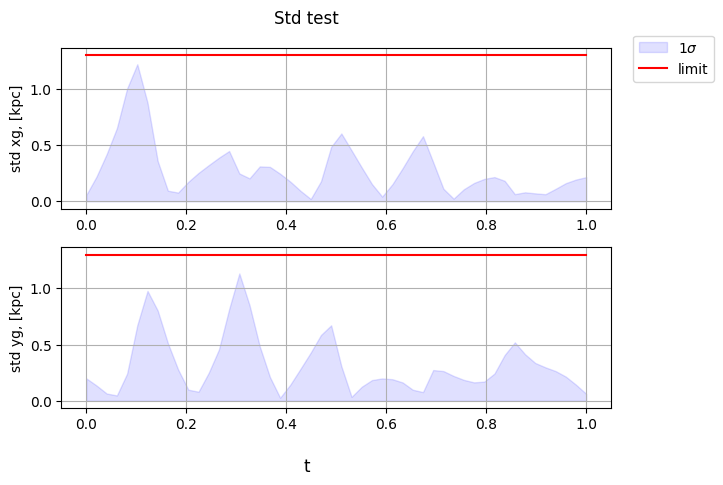

In [40]:
df_xy = citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[9]', 'data.data[10]'])
df_xy.rename({'data.data[0]': 't', 'data.data[9]': 'xg', 'data.data[10]': 'yg'}, axis = 1, inplace = True)
V_xy = va.Validation(df_xy, data_label = ['xg', 'yg'], param_label = 't', method = 'scale', num = 50, units = 'kpc')

log, table, fig = V_xy.std_test(limits = 1.3, n_std = 1, nan_passed = True, std_area = True, std_lines = False, std_color = 'b')

## Norm limit test

Test whether the parameter norm for each simulation do not exceed the given limit.

In [41]:
num = citros.batch('galactic orbits_1').info()['message_count']
print(f'Total number of messages: {num}')

Total number of messages: 2121


### Norm Linf

`norm_type` = 'Linf' - test whether the absolute maximum of the parameter of each simulation is less then the given limits

Let's check that the cluster is not goes too far from the Galactic center. We can query R and z ('data.data[1]' and 'data.data[5]') -  distance from the galactic axis and vertical distance from the galactic plane and d - distance from the Galactic center and check if its maximum value in all simulations do not exceed, for example, 4 kpc:

In [42]:
import numpy as np
df_dist = citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[1]', 'data.data[5]'])
df_dist.rename({'data.data[0]': 't', 'data.data[1]': 'R', 'data.data[5]': 'z'}, axis = 1, inplace = True)
df_dist['d'] = np.sqrt(df_dist['R']**2 + df_dist['z']**2)
V_dist = va.Validation(df_dist, data_label = 'd', param_label = 't', method = 'scale', num = 50, units = 'kpc')

norm_test Linf: passed


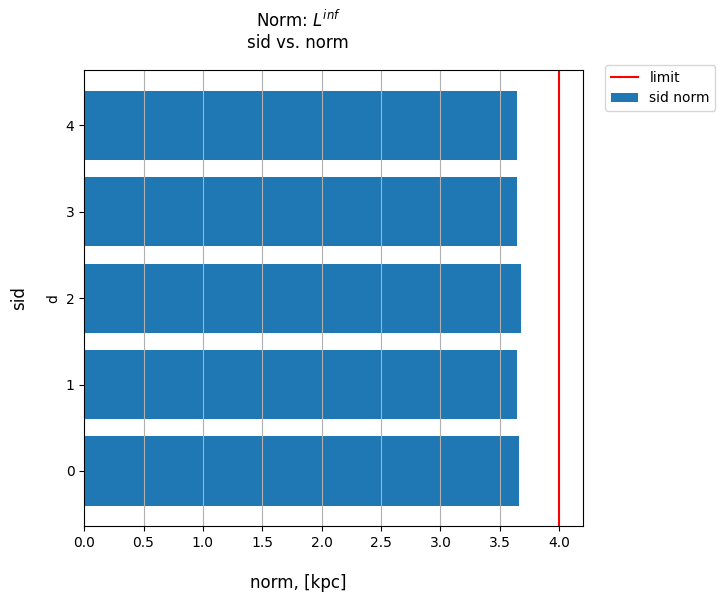

In [43]:
log, table, fig = V_dist.norm_test(norm_type = 'Linf', limits = 4)

Print the report of the test:

In [44]:
log.print()

{
 'test_param': {
   'limits': 4
 },
 'd': {
   'passed': True,
   'pass_rate': 1.0,
   'norm_value': {
     0: 3.663652983988284,
     1: 3.643658338066165,
     2: 3.674041661187262,
     3: 3.6469274591802967,
     4: 3.645357423423882
   },
   'failed': []
 }
}


Display DataFrame table that for each simulation indicates whether it passes the test or not:

In [45]:
print(table.head(5))

        d
sid      
0    True
1    True
2    True
3    True
4    True


### Norm L2

`norm_type` = 'L2' - test whether for each simulation the Euclidean norm (square root of the sum of the squares) does not exceed the given limit.

Using this type of norm, we can determine which simulation deviates the most from the galactic plane. We can do this by examining the 'z' parameter ('data.data[5]') and checking its total difference from z = 0:

norm_test L2: passed


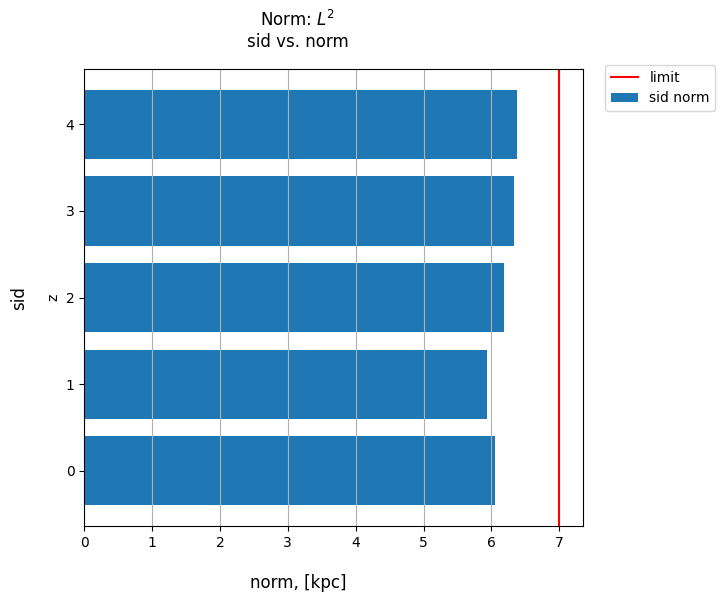

In [46]:
df_z = citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[5]'])
df_z.rename({'data.data[0]': 't', 'data.data[5]': 'z'}, axis = 1, inplace = True)
V_z = va.Validation(df_z, data_label = 'z', param_label = 't', method = 'scale', num = 50, units = 'kpc')
log, table, fig = V_z.norm_test(norm_type = 'L2', limits = 7)

In report we can see that the maximum deviation is in simulation sid = 4:

In [47]:
log.print()

{
 'test_param': {
   'limits': 7
 },
 'z': {
   'passed': True,
   'pass_rate': 1.0,
   'norm_value': {
     0: 6.048682000488772,
     1: 5.94246441108383,
     2: 6.188936145078873,
     3: 6.336789251153451,
     4: 6.380266011418894
   },
   'failed': []
 }
}


## Set multiple tests

Set the test listed above by set_tests() method.

Pass parameters of the tests as dictionaries with key being the test name ('std_bound', 'mean', 'sid', 'norm_L2', 'norm_Linf').

For example, to set tests for z parameter:

std_bound_test: failed
norm_test Linf: passed


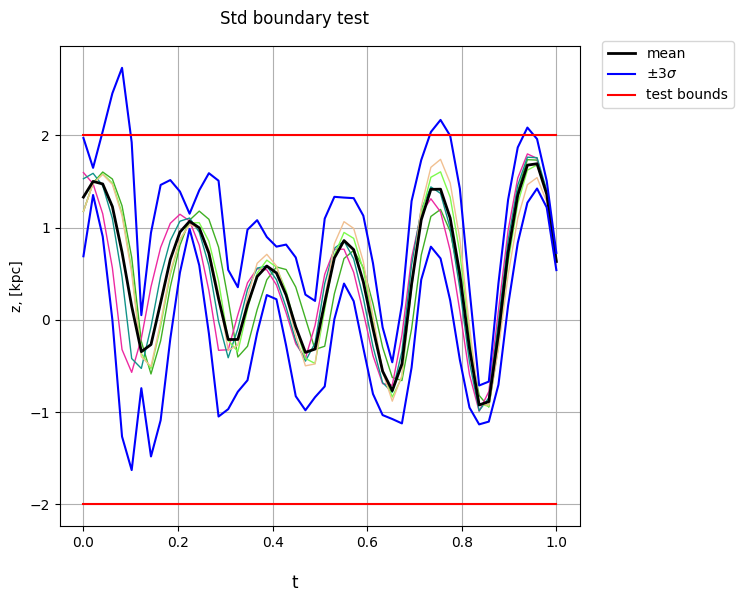

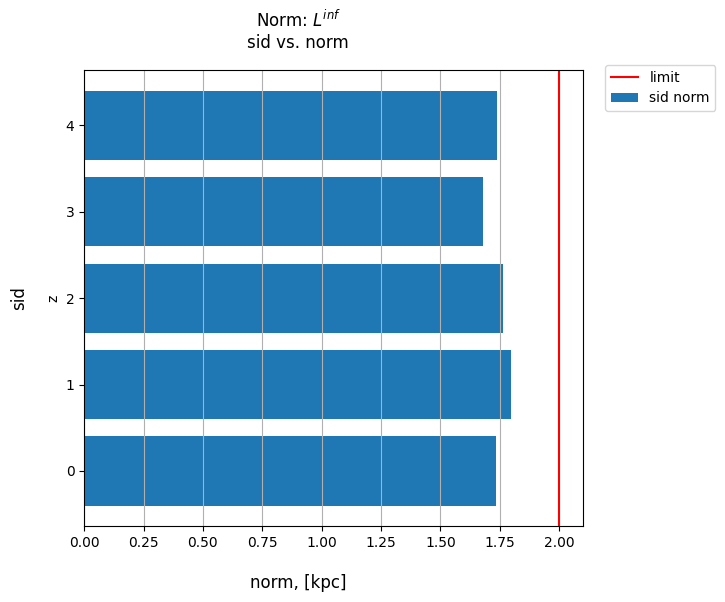

In [48]:
df_z = citros.batch('galactic orbits_1').topic('/gal_orbits').data(['data.data[0]', 'data.data[5]'])
df_z.rename({'data.data[0]': 't', 'data.data[5]': 'z'}, axis = 1, inplace = True)
V_z = va.Validation(df_z, data_label = 'z', param_label = 't', method = 'scale', num = 50, units = 'kpc')

logs, tables, figs = V_z.set_tests(test_method = 
                                 {'std_bound' : {'limits' : 2, 'n_std': 3},
                                  'norm_Linf' : {'limits' : 2}})

logs, tables, figs are the dictionaries with the corresponding to each test log, table and fig, where key of the dictionary is the name of the test:

In [49]:
logs['std_bound'].print()
print(tables['norm_Linf'])

{
 'test_param': {
   'limits': 2,
   'n_std': 3,
   'nan_passed': True
 },
 'z': {
   'passed': False,
   'pass_rate': 0.88,
   'failed': {
     2: 0.04081632653061224,
     3: 0.061224489795918366,
     4: 0.08163265306122448,
     36: 0.7346938775510203,
     37: 0.7551020408163265,
     46: 0.9387755102040816
   },
   'nan_std': {
   }
 }
}
        z
sid      
0    True
1    True
2    True
3    True
4    True


Add references to the all batches that were used in the current notebook:

In [50]:
ref = da.Ref()
ref.print()

REFERENCES:

yalyalieva lidia, lidia@lulav.space
galactic orbits_1, 'return_next_val_func', 2023-10-01 08:26:57
https://citros.io/gal_orbits/batch/3c89af7d-3dee-48d2-9a19-8201c6030346/

